# Part II - (Main Findings of Ford GoBike System Data Exploration)
## by Som Patrick


## Investigation Overview

>In this investigation, I wanted to look at the various genders available in the dataset and their correspondening user types in their respective numbers. The main focus was on the the member_gender and the user_type columns.



## Dataset Overview
> There are 183412 bikes in the dataset with 16 features ('duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type', 'member_birth_year', 'member_gender', 'bike_share_for_all_trip').
Some data points were removed from the analysis due to inconsistencies or missing information

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
bikes = pd.read_csv('201902-fordgobike-tripdata.csv')


In [3]:
# make a copy
bikes_copy = bikes.copy()

In [4]:
# start_time                  object to datatime
# end_time                    object to datatime
# start_station_id           float64 to  string
# end_station_id             float64 to string
# bike_id                      int64 to int
# member_birth_year          float64 to float


bikes_copy = bikes_copy.astype({'start_time': 'datetime64', 'end_time': 'datetime64', 
                  'start_station_id': 'string', 'end_station_id': 'string',
                  'bike_id': 'int', 'member_birth_year': 'float'})

<!-- # # data wrangling, removing inconsistent or missing data

# # converting datatypes
# # start_time                  object to datatime
# # end_time                    object to datatime
# # start_station_id           float64 to  string
# # end_station_id             float64 to string
# # bike_id                      int64 to string
# # member_birth_year          float64 to string


# bikes_copy = bikes_copy.astype({'start_time': 'datetime64', 'end_time': 'datetime64', 
#                   'start_station_id': 'string', 'end_station_id': 'string',
#                   'bike_id': 'string', 'member_birth_year': 'string'}) -->

In [5]:
# check missing values
bikes_copy.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [6]:
# drop missing values
bikes_new = bikes_copy.dropna()
bikes_new

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


### Composition of the various genders in the dataset 
Out of the total number of people(174952), 130500 are males , 40805 are females and 3647 are Other.i.e consider themselves as neigher male nor female.The visualization below depicts this data.

In [7]:
# value of count of the various genders
bikes_new['member_gender'].value_counts()

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

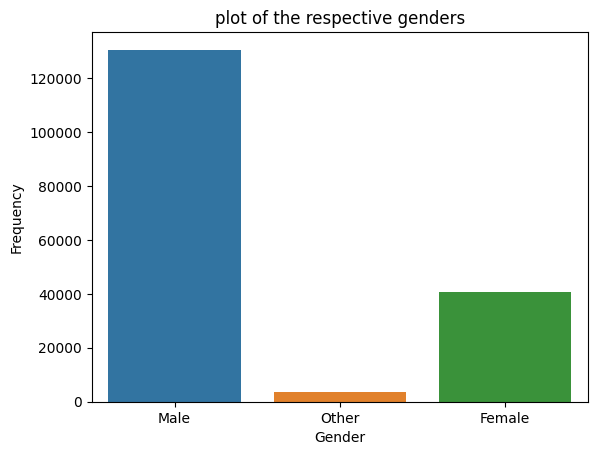

In [8]:
# plot

sns.countplot(data = bikes_new, x= 'member_gender', )

plt.title('plot of the respective genders');
plt.xlabel('Gender');
plt.ylabel('Frequency');


<!-- # # let's put the respective values above into a list

# gender =['Male','Female','Other']
# values =[130500, 40805, 3647]


# plt.bar( gender, values);
# plt.title('Total amount of people who used the  biking service based on gender');
# plt.xlabel('Gender');
# plt.ylabel('Values'); -->

### Types of users of the biking service.

In this part of the visualization, I wanted to find out the different types of users of the biking service. There are two types of users: Subscribers and Customers. A larger number of the were subscribers.

In [9]:
# value of count of the various genders
bikes_new['member_gender'].value_counts()

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

In [10]:
# calculate percentage of the various user types
subscriber = bikes_new['user_type'].value_counts()[0]
customer = bikes_new['user_type'].value_counts()[1]
total_users = subscriber + customer

# percentage each user type
sub_perct =  (subscriber / total_users * 100).round(2)
cus_perct = (customer / total_users * 100).round(2)

print ('percentage of subscribers:',sub_perct)
print ('percentage of customers:',cus_perct)

percentage of subscribers: 90.53
percentage of customers: 9.47


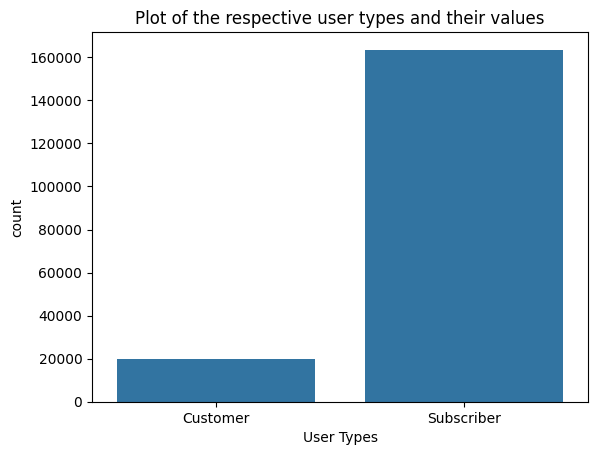

In [11]:
# seaborn plot
base_color = sns.color_palette()[0]
sns.countplot(data = bikes, x= 'user_type', color = base_color);
plt.xlabel('User Types');
plt.title('Plot of the respective user types and their values');

###  Percentage of the respective user types.
Subcribers made up about 90.53% of the users.i.e the majority and Customers made up the smallest percentage 9.47% 

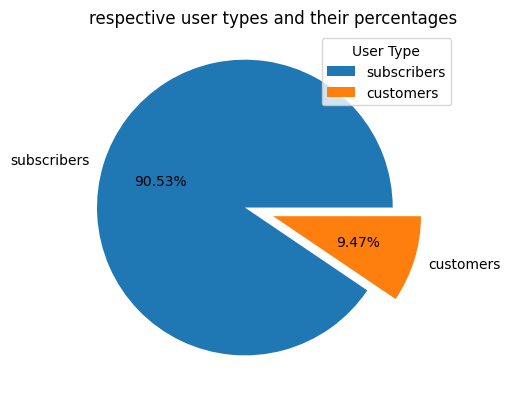

In [12]:
# plot of the respective user types and their percentages
types = [sub_perct,cus_perct]
label =['subscribers', 'customers']
myexplode = [0.2, 0]

plt.pie(types, labels = label,autopct='%1.2f%%', explode = myexplode);
plt.title('respective user types and their percentages');
plt.legend(title = "User Type");

### The various genders and their corresponding user types 
Out of a total number of 40805 females, 4623 of them are customers and 36182 are subscribers.Also 11493 and 119007 are males customers and subscribers respectively. Lastly, 3647 people are categorized as other genders, with 450 of them being customers and 3197 being subscribers.

In [13]:
# count
bikes_new.groupby(['member_gender','user_type'])["user_type"].count()

member_gender  user_type 
Female         Customer        4623
               Subscriber     36182
Male           Customer       11493
               Subscriber    119007
Other          Customer         450
               Subscriber      3197
Name: user_type, dtype: int64

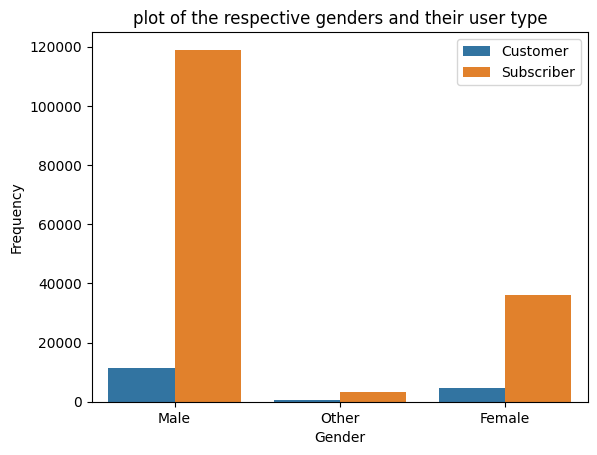

In [14]:
# plot

sns.countplot(data = bikes_new, x= 'member_gender', hue='user_type')

plt.title('plot of the respective genders and their user type');
plt.xlabel('Gender');
plt.ylabel('Frequency');
plt.legend();

<!-- # # put the respective genders into a list
# gender =['female','male', 'other']
# xposition = np.arange(len(gender))

# # put the respective values into a list
# customers = [4623,11493,450]
# subscribers = [36182,119007,3197]

# plt.bar(xposition-0.2,customers, width=0.4, label= 'customer');
# plt.bar(xposition+0.2,subscribers, width=0.4, label= 'subscriber');

# plt.xticks(xposition, gender);
# plt.title('plot of the respective genders and their user type');
# plt.xlabel('Gender');
# plt.ylabel('Frequency');
# plt.legend(); -->

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt